# Week 2: Predicting House Prices

## Constants

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import statsmodels.formula.api as smf

# from sklearn import cross_validation as cv
from sklearn import  model_selection as ms
from sklearn import linear_model 


%matplotlib inline

### Current Working Dir

In [2]:
os.getcwd()

'C:\\Users\\DrjNupurVihan\\Documents\\GitHub\\MachineLearning_UoW\\Course1'

##  Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
home_data = pd.read_csv("data/home_data.csv")

In [4]:
print ("Number of ROWS X COLUMNS")
print(home_data.shape)
print("\n")
home_data.head(3)

Number of ROWS X COLUMNS
(21613, 21)




,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
home_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exploring the data for housing sales 

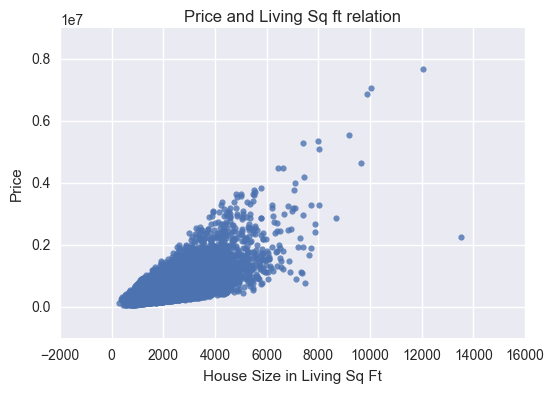

In [6]:
sns.regplot('sqft_living', 'price', 
            data=home_data,
            fit_reg=False) # to stope a linear regressed line to be plotted by default

plt.title('Price and Living Sq ft relation')
plt.xlabel('House Size in Living Sq Ft')
plt.ylabel('Price')

## Create a simple regression model of 1 feature

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

where:

$y$ is the response  
$x$ is the feature  
$\beta_0$ is the intercept  
$\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients.


For this initial simplistic regression model we are going to use:

**`sqft_living`** as the independent variable or $x$  
**`price`** as the dependent variable or $y$

#### Creating Training and Test data sets and X, y

In [7]:
train, test = ms.train_test_split(home_data, train_size = 0.80, random_state=0)

In [8]:
print(train.shape)
print(test.shape)

(17290, 21)
(4323, 21)


In [9]:
X = train[['sqft_living']]
y = train.price

#### Model Approach 1: Using Scikit-Learn

Creating a model in `sklearn` is relativey simple. Create a object that calls the function and use the object to fit **`X`** & **`y`**

In [10]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict too.

In [11]:
print (model.intercept_)
print (model.coef_)
model.score(X,y)    # calculate R-Squared

-48257.0634556
[ 283.96855737]


0.49552283548992376

**_RMSE in sklearn_**

In [12]:
scores = ms.cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

In [13]:
MSE = scores.mean()# calculate RMSE
RMSE_model1 = math.sqrt(-1*MSE)
RMSE_model1

265116.21163258346

##### Let's show what our predictions look like

In [14]:
model.predict(test[['sqft_living']])

array([  357817.97358056,  1277876.09945262,   360657.65915424, ...,
         337940.17456481,   221513.06604396,   417451.37062782])

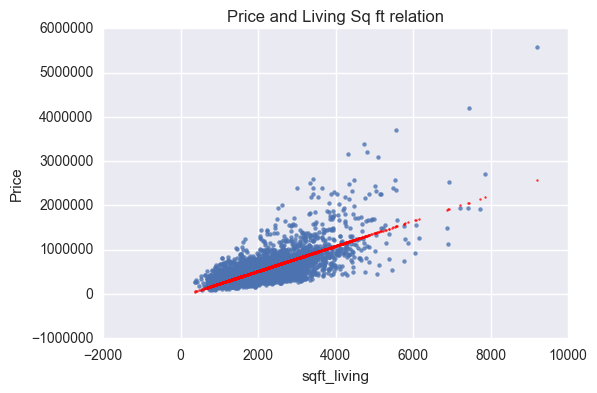

In [15]:
# plot original points
sns.regplot(test['sqft_living'], test['price'],
            fit_reg=False, # to stop a linear regressed line to be plotted by default
            scatter_kws={'s':10})

plt.title('Price and Living Sq ft relation')
plt.xlabel('House Size in Living Sq Ft')
plt.ylabel('Price')

#plot regression line generated by the model
sns.regplot(test['sqft_living'], model.predict(test[['sqft_living']]),
            fit_reg=False, # to stope a linear regressed line to be plotted by default
            scatter_kws={'s':3},
           color = 'red')

Blue dots are original data, red line is the prediction from the simple regression.

#### Model Approach 2: Using Statsmodels

In [16]:
lm = smf.ols(formula='price ~ sqft_living', data=train).fit()
print(lm.conf_int())

                        0             1
Intercept   -57982.834585 -38531.292326
sqft_living    279.697206    288.239909


In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Mon, 31 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:00:16   Log-Likelihood:            -2.4041e+05
No. Observations:               17290   AIC:                         4.808e+05
Df Residuals:                   17288   BIC:                         4.808e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -4.826e+04   4961.872     -9.726      0.000      -5.8e+04 -3.85e+04
sqft_living   283.9686      2.179    130.312      0.000       279.697   288.240
==============================================================================
Omnibus:                    12071.546   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471754.944
Skew:                           2.876   Prob(JB):                         0.00
Kurtosis:                      27.935   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
lm.predict(test[['sqft_living']])

array([  357817.97358056,  1277876.09945262,   360657.65915424, ...,
         337940.17456481,   221513.06604396,   417451.37062783])

**_RMSE in statsmodels_**

In [19]:
math.sqrt(lm.mse_resid)

264538.26428743213

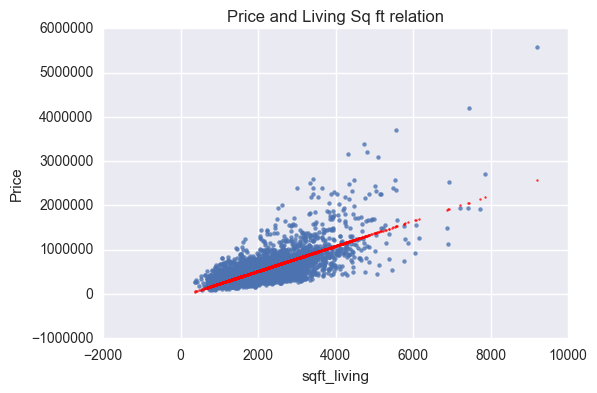

In [20]:
# plot original points
sns.regplot(test['sqft_living'], test['price'],
            fit_reg=False, # to stop a linear regressed line to be plotted by default
            scatter_kws={'s':10})

plt.title('Price and Living Sq ft relation')
plt.xlabel('House Size in Living Sq Ft')
plt.ylabel('Price')

#plot regression line generated by the model
sns.regplot(test['sqft_living'], lm.predict(test[['sqft_living']]),
            fit_reg=False, # to stope a linear regressed line to be plotted by default
            scatter_kws={'s':3},
           color = 'red')

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [21]:
multi_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

### Build a regression model with more features

In [22]:
X = train[multi_features]
y = train.price

In [23]:
model2 = linear_model.LinearRegression()
model2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print (model2.intercept_)
print (model2.coef_)
model2.score(X,y)    # calculate R-Squared

-60558259.0181
[ -5.66006330e+04   1.10870936e+04   3.20408369e+02  -2.89499140e-01
  -2.41800491e+03   6.17971071e+02]


0.51814231791782528

In [25]:
scores = ms.cross_val_score(model2, X, y, 
                            scoring='neg_mean_squared_error', 
                            cv=5) # cv is 5 because the data is spit in ration 4:1
MSE = scores.mean()# calculate RMSE
RMSE_model2 = math.sqrt(-1*MSE)
RMSE_model2

259543.26671607167

In [26]:
test[multi_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
17384,2,1.50,1430,1650,3.0,98125
722,4,3.25,4670,51836,2.0,98005
2680,2,0.75,1440,3700,1.0,98107
18754,2,1.00,1130,2640,1.0,98109
14554,4,2.50,3180,9603,2.0,98155


In [27]:
test_pred = model2.predict(test[multi_features])
test_pred

array([  434034.0010142 ,  1292090.93695027,   422041.82178832, ...,
         322799.30829762,   209079.01877513,   382571.52410872])

### Comparing the results of the simple model with adding more features

The RMSE goes down from {{ RMSE_model1 }} to {{ RMSE_model2 }} using more features.

### Apply learned models to predict prices of random houses

The first house we will use is considered an "average" house in Seattle. 

In [ ]:
house1 = home_data[home_data['id']==5309101200]

In [ ]:
print (house1['price']) # Actual House Price
print (model.predict(house1[['sqft_living']])) # Predicted house price by Model 1 with 1 feature
print (model2.predict(house1[multi_featured])) # Predicted house price by Model 1 with multiple feature

In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better as indicated by its RMSE.

## Quiz

### Question 1

Discover which neighborhood (zip code) of Seattle had the highest average house sale price. Now, take the data, select only the houses with this zip code, and compute the average price.

### Question 2

First select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What fraction of the all houses have ‘sqft_living’ in this range?

### Question 3

**advanced_features:**   

    'bedrooms',     
    'bathrooms',   
    'sqft_living',   
    'sqft_lot',   
    'floors',   
    'zipcode',   
    'condition',   
    'grade',   
    'waterfront',   
    'view',   
    'sqft_above',   
    'sqft_basement',   
    'yr_built',   
    'yr_renovated',   
    'lat',   
    'long',   
    'sqft_living15',    
    'sqft_lot15'   

Compute the RMSE (root mean squared error) on the test_data for the model using just multi_features, and for the one using advanced_features. What is the difference in RMSE between the model trained with multi_features and the one trained with advanced_features?

In [30]:
advanced_features = [
    'bedrooms', 
    'bathrooms', 
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'zipcode', 
    'condition', # condition of house
    'grade', # measure of quality of construction
    'waterfront', # waterfront property
    'view', # type of view
    'sqft_above', # square feet above ground
    'sqft_basement', # square feet in basement
    'yr_built', # the year built
    'yr_renovated', # the year renovated
    'lat', 'long', # the lat-long of the parcel
    'sqft_living15', # average sq.ft. of 15 nearest neighbors 
    'sqft_lot15'] # average lot size of 15 nearest neighbors

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']